In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [3]:
import warnings
warnings.filterwarnings('ignore')
mouse = '../resources/mousedrug.csv'
trials = '../resources/trials.csv'

In [4]:
mouse_data = pd.read_csv(mouse)
clin_trials = pd.read_csv(trials)
mouse_data.head()

,Mouse ID,Drug
0,f234,Stelasyn
1,x402,Stelasyn
2,a492,Stelasyn
3,w540,Stelasyn
4,v764,Stelasyn


In [5]:
trial_data = pd.merge(mouse_data, clin_trials, on="Mouse ID")

In [33]:
trial_data.head()

,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,f234,Stelasyn,0,45.000000,0
1,f234,Stelasyn,5,47.313491,0
2,f234,Stelasyn,10,47.904324,0
3,f234,Stelasyn,15,48.735197,1
4,f234,Stelasyn,20,51.112713,2


In [18]:
tr_treat = trial_data.groupby(["Drug", "Timepoint"])
tr_mean = tr_treat["Tumor Volume (mm3)"].mean()
tr_mean2 = pd.DataFrame(tr_mean)
tr_mean3 = tr_mean2.reset_index()
tr_mean3.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325


Text(0.5, 1.0, 'Change In Tumor Volume Over Time')

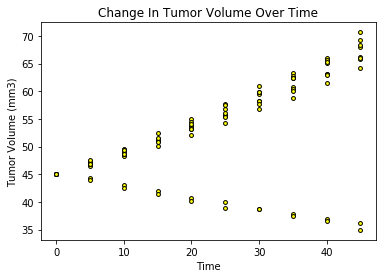

In [45]:
plt.scatter(tr_mean3["Timepoint"], tr_mean3["Tumor Volume (mm3)"], s=15, marker="o", facecolors="yellow", edgecolors="black")
plt.xlabel("Time")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Change In Tumor Volume Over Time")

In [37]:
tr_sem = tr_treat["Tumor Volume (mm3)"].sem()
tr_sem2 = pd.DataFrame(tr_sem)
tr_sem2.head()

Tumor Volume (mm3)
Drug      Timepoint                    
Capomulin 0                    0.000000
          5                    0.448593
          10                   0.702684
          15                   0.838617
          20                   0.909731

In [43]:
group_df = trial_data.groupby(["Timepoint", "Drug"])
group_df2 = group_df["Tumor Volume (mm3)"].mean()
group_df3 = pd.DataFrame(group_df2)
group_df3.unstack()

Tumor Volume (mm3)                                              \
Drug               Capomulin   Ceftamin  Infubinol   Ketapril   Naftisol   
Timepoint                                                                  
0                  45.000000  45.000000  45.000000  45.000000  45.000000   
5                  44.266086  46.503051  47.062001  47.389175  46.796098   
10                 43.084291  48.285125  49.403909  49.582269  48.694210   
15                 42.064317  50.094055  51.296397  52.399974  50.933018   
20                 40.716325  52.157049  53.197691  54.920935  53.644087   
25                 39.939528  54.287674  55.715252  57.678982  56.731968   
30                 38.769339  56.769517  58.299397  60.994507  59.559509   
35                 37.816839  58.827548  60.742461  63.371686  62.685087   
40                 36.958001  61.467895  63.162824  66.068580  65.600754   
45                 36.236114  64.132421  65.755562  70.662958  69.265506   

                                                                  
Drug         Placebo   Propriva   Ramicane   Stelasyn  Zoniferol  
Timepoint                                                         
0          45.000000  45.000000  45.000000  45.000000  45.000000  
5          47.125589  47.248967  43.944859  47.527452  46.851818  
10         49.423329  49.101541  42.531957  49.463844  48.689881  
15         51.359742  51.067318  41.495061  51.529409  50.779059  
20         54.364417  53.346737  40.238325  54.067395  53.170334  
25         57.482574  55.504138  38.974300  56.166123  55.432935  
30         59.809063  58.196374  38.703137  59.826738  57.713531  
35         62.420615  60.350199  37.451996  62.440699  60.089372  
40         65.052675  63.045537  36.574081  65.356386  62.916692  
45         68.084082  66.258529  34.955595  68.438310  65.960888